<a href="https://colab.research.google.com/github/FeFiFoFaiza/EAS4940/blob/main/PS0_OGGMIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started with OGGM Edu: idealised glaciers   

The purpose of thise notebook exercise to familiarize you with working in Google Colab and get you acquainted with the OGGM interface. You will not need to do much coding this exercise, but is important that you read through the whole notebook and make sure that all of the cells run so that you are prepared for other coding exercises in future problem sets.

First, we need to download the Open Global Glacier Model engine and the simplified educational wrapper that we will use to access it. To run a block of code, click on the "play" arrow that appears when you hover over the left hand corner of the code block. You'll know that the code block finished running when you get a green check mark to the left of it. You will see the output of the code appear in the space directly beneath the code block.

In [ ]:
!pip install oggm
!pip install git+https://github.com/OGGM/oggm-edu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.8/418.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.6 MB/s eta 0:00:00
  Cloning https://github.com/OGGM/oggm-edu to /tmp/pip-req-build-fm1hxjiq
  Running command git clone --filter=blob:none --quiet https://github.com/OGGM/oggm-edu /tmp/pip-req-build-fm1hxjiq
  Resolved https://github.com/OGGM/oggm-edu to commit 834c973633f0e68be31828876df2f2c0560e53cb
  Preparing metadata (setup.py) ... done
  Created wheel for oggm-edu: filename=oggm_edu-0.0.1-py3-none-any.whl size=46431 sha256=54b92a1e295d8f9bae160aff01a18be0639fd41d391e2ad8f63e35831331229b
  Stored in directory: /tmp/pip-ephem-wheel-cache-byi8ptb5/wheels/99/db/d2/6baadccf16aea06a633b0a3fb4fd01858ff3287df4b398b691
Successfully built oggm-edu


OGGM Edu provides a simple way to experiment with glaciers on your computer.
This is achieved by a high level interface to the different parts of the complex glacier model that is OGGM.
You as a user will interact with a few objects that provide you with methods and attributes fitting for a glacier and the parts that make it up.

The goal of this notebook is to introduce you to OGGM Edu and how it can be used to simulate two idealised glaciers.

We begin by importing the classes that we need

In [ ]:
from oggm_edu import MassBalance, GlacierBed, Glacier, GlacierCollection

The three main classes that we are going to use are the
- `GlacierBed`
- `MassBalance`
- `Glacier`

The `GlacierBed` provide an easy way to define the glacier bed while the `MassBalance` is used to define the mass balance of the glacier.
The `Glacier` then provide us with methods to progress and visualise the glacier and informative attributes.
To create a glacier we need to give it a bed and a mass balance.

## Part 1: First steps

In our first experiment we want to create a glacier that is as simple as possible.
This means a glacier bed with a constant slope and width and a simple mass balance.
We begin with creating the bed of our glacier.

### The glacier bed
In its most simple form the glacier bed requires a top and bottom altitude, and a width.

In [ ]:
# All arguments are specified in meters.
bed = GlacierBed(top=3400, bottom=1500, width=300)

In [ ]:
# This gives us some statistics about the bed.
bed

,
GlacierBed,
Bed type,Linear bed with a constant width
Top [m],3400
Bottom [m],1500
Width(s) [m],[300]
Length [km],20.0


Let's plot the bed to make sure that it looks like we expect.
The `bed` object has a built in method for this which provide us with a side and top-down view of the glacier domain.

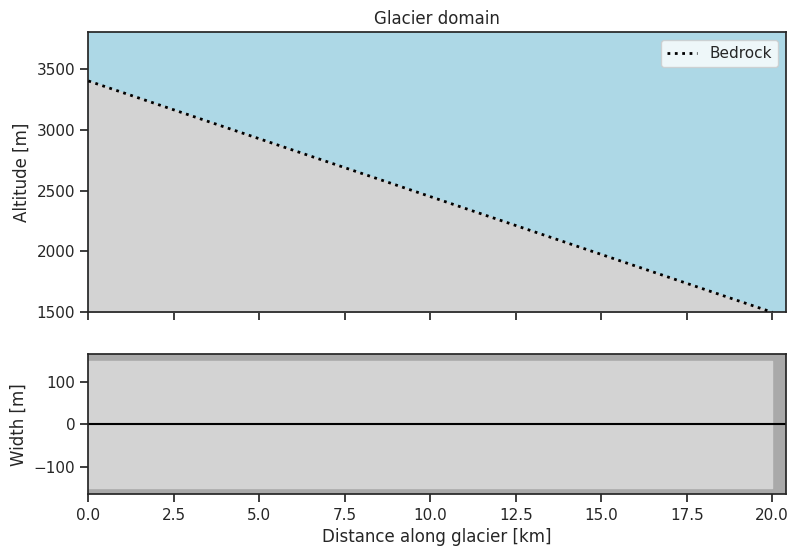

In [ ]:
bed.plot()

**Part 1a (1 pt):** Add a new code block below by clicking in this text block, then hitting the "+ Code" button from the menu bar at the top of the screen. Define a new glacier bed that starts at an elevation of 2000 m, end at an elevation of 800m, and is 150 m wide. Plot a diagram of your new glacier geometry.

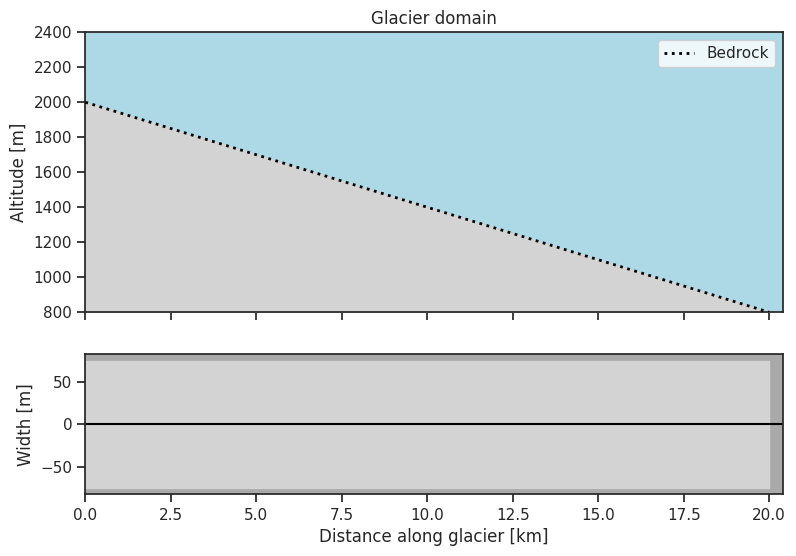

In [ ]:
newBed = GlacierBed(top=2000, bottom=800, width=150);
newBed.plot()

For finer control over the bed slope you can pass a single value to `slopes` during the creation

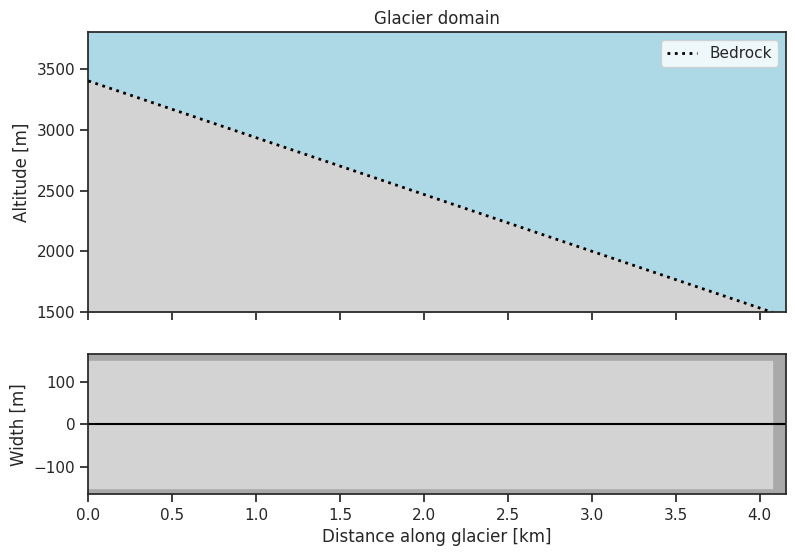

In [ ]:
# This will give us a steeper bed compared to the default.
bed_with_slope = GlacierBed(top=3400, bottom=1500, width=300, slopes=25)
bed_with_slope.plot()

You can also pass a sequence of slope angles in `slopes` - for this you also need to specify the altitude spans of the sections with the `slope_sections` argument.

There should be one more entry in `slope_sections` compared to the entries in slopes.
The first and last value in `slope_sections` should match the top and bottom of the glacier.

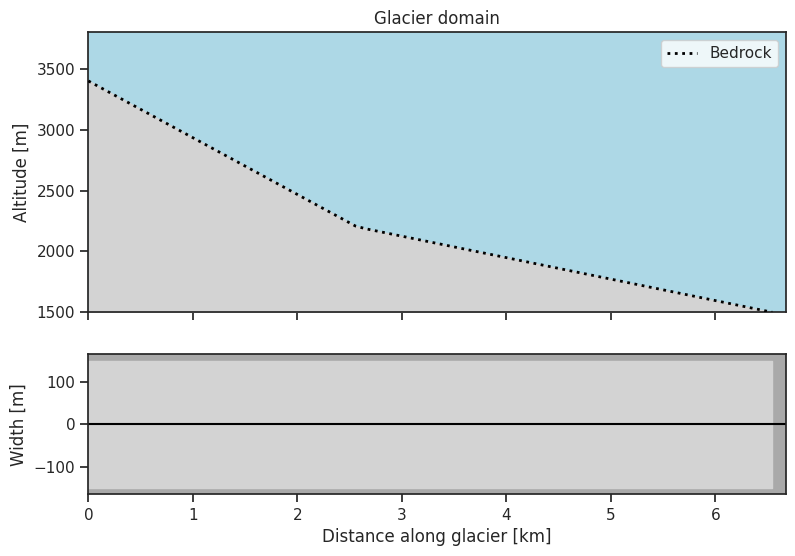

In [ ]:
# A bed with multiple slopes
bed_with_multiple_slopes = GlacierBed(top=3400, bottom=1500, width=300,
                                      slopes=[25, 10],
                                      # Slope sections are defined by altitude
                                      # pairs. Here we have two parirs.
                                      slope_sections=[3400, 2200, 1500])
bed_with_multiple_slopes.plot()

### Mass balance

For the glacier to grow it needs a mass balance model.
The mass balance is responsible for adding snow and removing ice through melt on the glacier.
In our case it will be a simple linear mass balance, meaning that it decreases linearly with altitude.

The mass balance is defined by the equilibrium line altitude (ELA) and the altitude gradient (in mm yr$^{-1}$ m$^{-1}$).
The ELA defines at what altitude the mass balance is zero and the altitude gradient how much the mass balance changes with altitude.

We set the ELA of our glacier to 3000 meters and the altitude gradient to 4 mm yr$^{-1}$ m$^{-1}$.

In [ ]:
mass_balance = MassBalance(ela=3000, gradient=4)

In [ ]:
mass_balance

,
MassBalance,
ELA [m],3000
Original ELA [m],3000
Temperature bias [C],0
Gradient [mm/m/yr],[4]


### Glacier initialisation

We can now take our bed and the mass balance and create a glacier which we can then perform experiments on.

In [ ]:
# Initialise the glacier
glacier = Glacier(bed=bed, mass_balance=mass_balance)

Similarly to the bed, we can get some statistics about the glacier by simply calling it.
However since we just created the glacier, everything will be zero.

In [ ]:
# Some statistics about the glacier
glacier

,
Attribute,
Id,1
Type,Glacier
Age,0
Length [m],0.0
Area [km2],0.0
Volume [km3],0.0
Max ice thickness [m],0.0
Max ice velocity [m/yr],None
AAR [%],NaN


### Progressing the glacier

Now the glacier has all the ingredients needed to evolve.

Let's first progress the glacier to year 1.

In [ ]:
# We want to progress the glacier to year 1.
glacier.progress_to_year(1)

And let's take a look at the glacier.
As the bed, it has a in method for this.

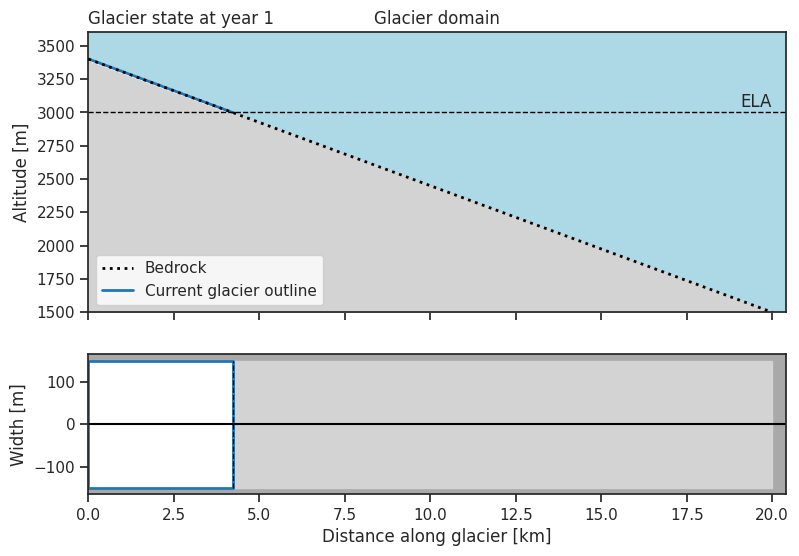

In [ ]:
glacier.plot()

Here we can see that there is thin cover of ice from the top and 4 km down the glacier bed.
So the glacier almost reaches the point where the bed intersects the ELA (~4 km).
We can also take a look at some of statistics of the glacier again to get some more details:

In [ ]:
glacier

,
Attribute,
Id,1
Type,Glacier
Age,1
Length [m],4300.0
Area [km2],1.29
Volume [km3],0.00115
Max ice thickness [m],1.782245
Max ice velocity [m/yr],2.1045127747276928e-07
AAR [%],97.674419


From the statistics we can read that the glacier has a length of 4 km and covers an area of 1.2 km$^2$.
The glacier will grow considerably in the upcoming years, and the ice thickness should become apparent even in the altitude - distance plot.
Let us progress the glacier to year 150 and take a look.

In [ ]:
glacier.progress_to_year(150)

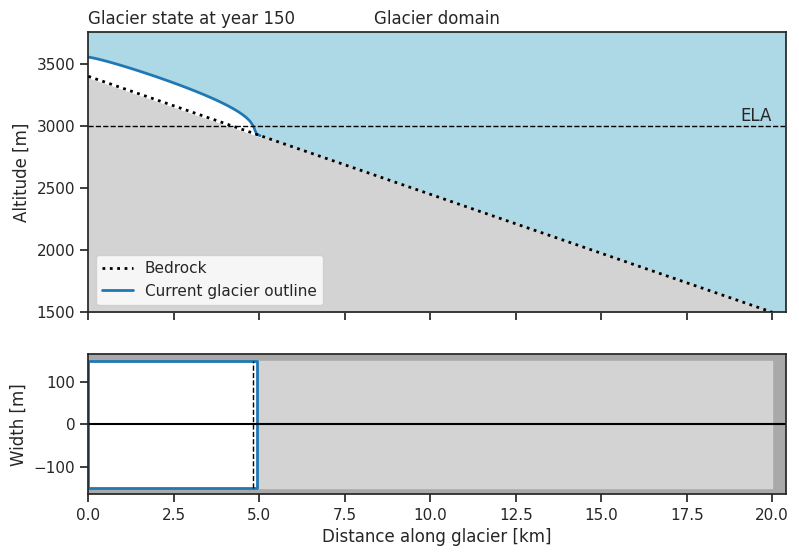

In [ ]:
glacier.plot()

Now we can clearly see the difference between the surface of the glacier and the bedrock.
Let's print the same statistics about the glacier as before:

In [ ]:
glacier

,
Attribute,
Id,1
Type,Glacier
Age,150
Length [m],5000.0
Area [km2],1.5
Volume [km3],0.244588
Max ice thickness [m],185.561606
Max ice velocity [m/yr],58.101295324090245
AAR [%],98.0


**Part 1b (2pts):** Answer the following questions by editing this text box and typing your answers in underneath the questions.

(1) By what percentage has the glacier length increased from year 1 to year 150? What about the area? Why do you think this happened?

To answer these questions, double click in this text box with your mouse, then type in your answers under the question. This is how you will respond to conceptual questions scattered throughout programming exercises in future problem sets.

1. The glacier length increased by about 16.3%. The area also increased by 16.3%. I think the area and length of the glacier is proportional because the longer the glacier is, the more snow (area) it can accumulate which in turn increases the area.

Note that the glacier is now 150 years old.
If we try progressing the glacier to the same year again, nothing will happen.
It evens gives us a warning.

In [ ]:
glacier.progress_to_year(150)

/usr/local/lib/python3.10/dist-packages/oggm_edu/glacier.py:559: UserWarning: Year has to be above the current age of the glacier. It is not possible to de-age the glacier. Geometry will remain the same.
  warnings.warn(msg)


We can easily progress the glacier even longer:

In [ ]:
glacier.progress_to_year(500)

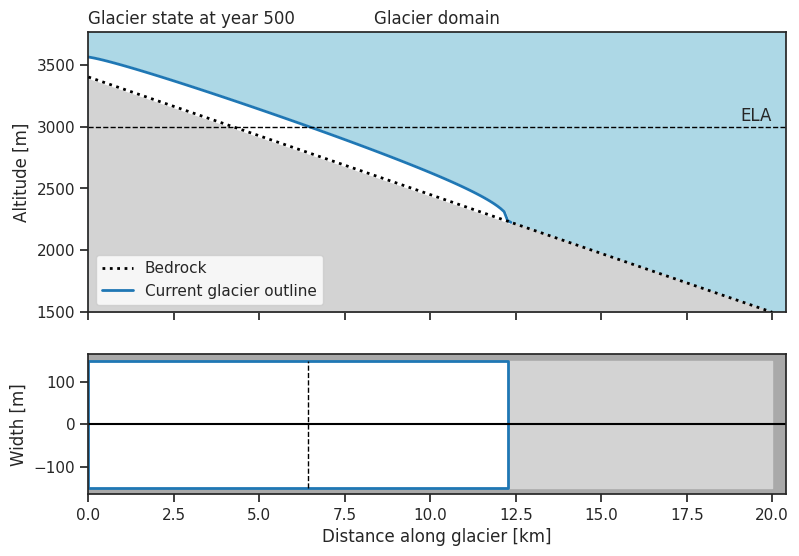

In [ ]:
glacier.plot()

In [ ]:
glacier

,
Attribute,
Id,1
Type,Glacier
Age,500
Length [m],12300.0
Area [km2],3.69
Volume [km3],0.698493
Max ice thickness [m],214.222348
Max ice velocity [m/yr],64.3471902975956
AAR [%],52.845528


The glaciers has now grown considerably further down our made up mountain, well below the ELA.

It is important to note that the model can not progress back in time.
Once at year 500, we can not de-age the glacier.

In [ ]:
glacier.progress_to_year(450)

/usr/local/lib/python3.10/dist-packages/oggm_edu/glacier.py:559: UserWarning: Year has to be above the current age of the glacier. It is not possible to de-age the glacier. Geometry will remain the same.
  warnings.warn(msg)


**Let's do the same with one of the glaciers with a non-linear bed profile!**

In [ ]:
# We create a new mass balance for this glacier.
mass_balance_2 = MassBalance(ela=2500, gradient=4)
# Initialise the glacier
glacier_multiple_slopes = Glacier(bed=bed_with_multiple_slopes,
                                  mass_balance=mass_balance_2)
# Progress the glacier
glacier_multiple_slopes.progress_to_year(400)

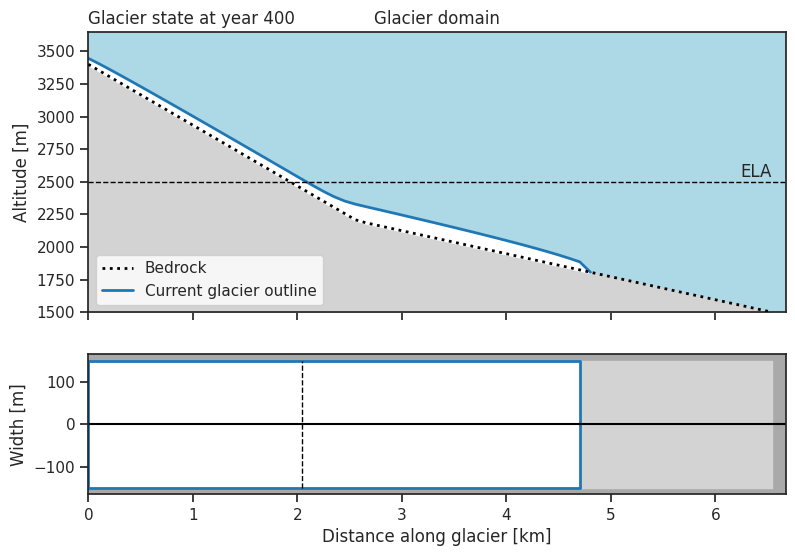

In [ ]:
# And plot the glacier
glacier_multiple_slopes.plot()

### Glacier history
This brings us to the glacier history.
This is just what it sounds like, a history of the length, volume and area of the glacier.
We can access the data through the `.history` attribute

In [ ]:
glacier.history

<xarray.Dataset>
Dimensions:           (time: 501)
Coordinates:
  * time              (time) float64 0.0 1.0 2.0 3.0 ... 497.0 498.0 499.0 500.0
    calendar_year     (time) int64 0 1 2 3 4 5 6 ... 494 495 496 497 498 499 500
    calendar_month    (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    hydro_year        (time) int64 0 1 2 3 4 5 6 ... 494 495 496 497 498 499 500
    hydro_month       (time) int64 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4
Data variables:
    volume_m3         (time) float64 0.0 1.15e+06 ... 6.984e+08 6.985e+08
    volume_bsl_m3     (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    volume_bwl_m3     (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    area_m2           (time) float64 0.0 1.29e+06 1.29e+06 ... 3.69e+06 3.69e+06
    length_m          (time) float64 0.0 4.3e+03 4.3e+03 ... 1.23e+04 1.23e+04
    calving_m3        (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    calving_rate_myr  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/13)
    description:          OGGM model output
    oggm_version:         1.6.1
    calendar:             365-day no leap
    creation_date:        2024-01-25 09:03:49
    water_level:          0
    glen_a:               2.4e-24
    ...                   ...
    mb_model_class:       MassBalance
    mb_model_hemisphere:  nh
    mb_model_rho:         900.0
    mb_model_orig_ela_h:  3000
    mb_model_ela_h:       3000
    mb_model_grad:        4

And we can quickly visualise the history of the glacier with the `.plot_history()` method

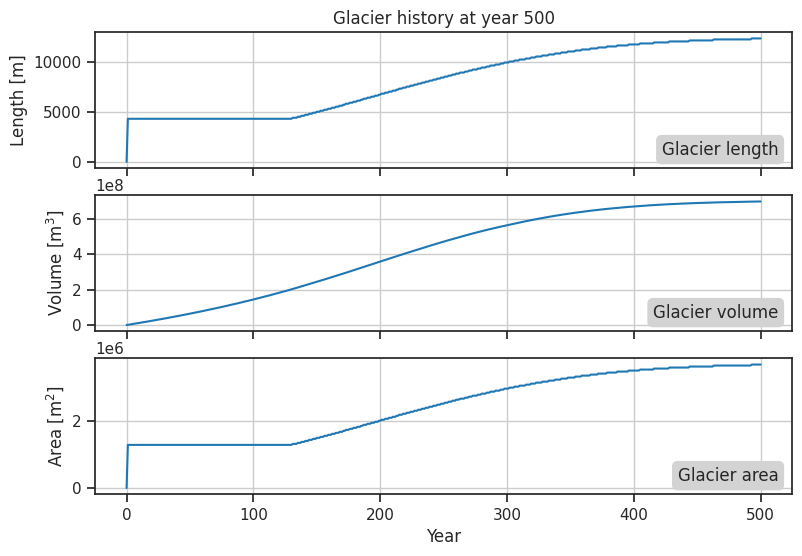

In [ ]:
glacier.plot_history()

The glacier length and area has a step in the first year.
This has to do with how OGGM internally deals with snow and ice, it does not differentiate between them.
And since the mass balance is always positive above the ELA, any snowfall in the first year above the ELA will remain and be classified as part of the glacier, and contribute to the length and area.

This is why after the first year, the glacier's length and area remains constant for a few years.
In this initial stage, the ice is so thin that any flow bringing ice below the ELA will not be large enough to compensate for the high ablation rate, and any ice melts away.

When the ice thickness has increased enough for the ice flow to surpass the ablation rate below the ELA, the glacier length can begin to increase.

### Equilibrium state
After several centuries, the glacier reaches a balance with its climate.
This means that its length and volume won't change anymore, as long as all physical parameters and the climate stay constant.
The `Glacier` has a method which progress the glacier to equilibrium `.progress_to_equilibrium()`, more on this in later notebooks.

## A first experiment

We have now seen how to setup a simple glacier and progress it to any year.
Now we will move a little bit closer to reality and define a glacier with changing widths.
Like many real glaciers the new glacier will be wider at the top (in the accumulation area) and have a constant width below the ELA.

We can achieve this by creating a new `Bed` and instead of specifying the top and bottom altitudes along with the width, we specify altitudes and widths in pairs:  

In [ ]:
wide_narrow_bed = GlacierBed(altitudes=[3400, 2800, 1500],
                             widths=[600, 300, 300])

In [ ]:
wide_narrow_bed

,
GlacierBed,
Bed type,Linear bed with a variable width
Top [m],3400
Bottom [m],1500
Width(s) [m],"[[600, 300, 300]]"
Length [km],20.0


Here the first and last values in `altitudes` and `widths` correspond to the top/bottom altitude/width.
Any values in between will change the shape of the bed further.

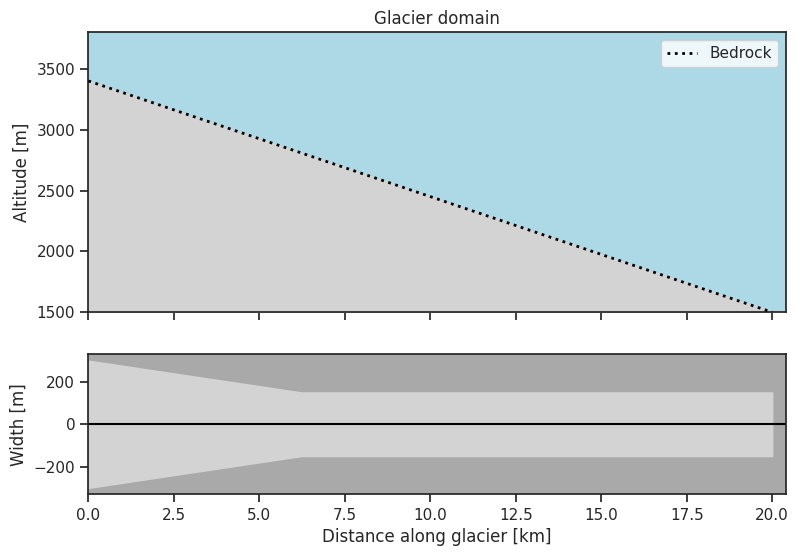

In [ ]:
wide_narrow_bed.plot()

We use the new bed to create a new glacier

In [ ]:
wide_narrow_glacier = Glacier(bed=wide_narrow_bed,
                              mass_balance=mass_balance)

In [ ]:
wide_narrow_glacier

,
Attribute,
Id,3
Type,Glacier
Age,0
Length [m],0.0
Area [km2],0.0
Volume [km3],0.0
Max ice thickness [m],0.0
Max ice velocity [m/yr],None
AAR [%],NaN


We can now introduce the `GlacierCollection`.
This is a utility which can store multiple glaciers and can be used to easily compare and run experiments on multiple glaciers.
The `GlacierCollection` will be used extensively throughout these notebooks and its functionality will be explained further as we go along.

In [ ]:
# We initialise a collection
collection = GlacierCollection()
# And then add the two glaciers available in this notebook.
collection.add([glacier, wide_narrow_glacier])

We can get a quick look at the collection by simply calling it

In [ ]:
collection

,Id,Type,Age,Length [m],Area [km2],Volume [km3],Max ice thickness [m],Max ice velocity [m/yr],AAR [%],Response time [yrs],...,Basal sliding,Bed type,Top [m],Bottom [m],Width(s) [m],Length [km],ELA [m],Original ELA [m],Temperature bias [C],Gradient [mm/m/yr]
Glacier,,,,,,,,,,,,,,,,,,,,,
1,1,Glacier,500,12300.0,3.69,0.698493,214.222348,64.34719,52.845528,NaN,...,0,Linear bed with a constant width,3400,1500,300,20.0,3000,3000,0,4
2,3,Glacier,0,0.0,0.00,0.000000,0.000000,None,NaN,NaN,...,0,Linear bed with a variable width,3400,1500,"[600, 300, 300]",20.0,3000,3000,0,4


Before plotting the glaciers in the collection, we can progress them to the same year with the `.progress_to_year()` method.

In [ ]:
collection.progress_to_year(600)

We can then plot the collection

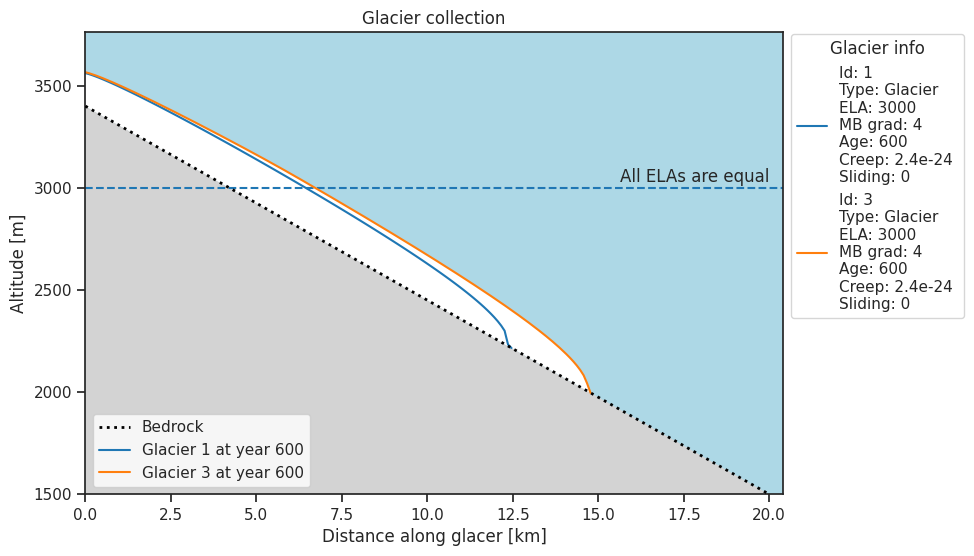

In [ ]:
collection.plot()

**Part 1c (2 pts):** Answer the following question.

(1) The glacier with a wider accumulation area is longer compared to the simple glacier area at year 600. Give a possible explanation why.

1. The bigger width contributes to a bigger area and since length and area are correlated, the length also is bigger.

Similarly to the glacier the collection has a method for easily plotting the histories of the held glaciers.

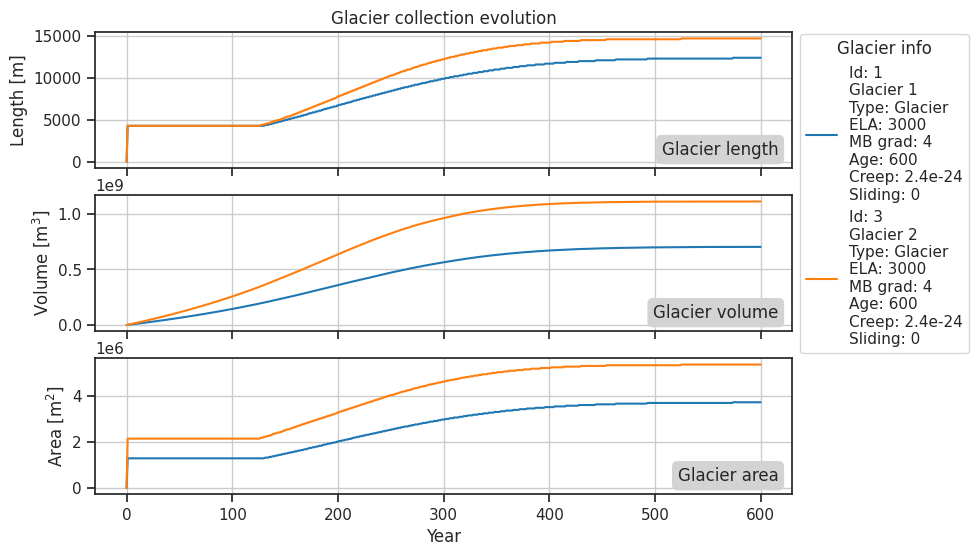

In [ ]:
collection.plot_history()

To submit colab notebooks for grading, you will export them as pdf files using the code below. These commands may take a little while (~1-2 min) since it needs to donwload and install a number of Latex packages. To retrieve your exported pdf file, click on the folder symbol on the left hand menu bar. You should see a list of directories and files, including the one you just created. Left-click on the pdf file to download it. Before you submit the file, please append your netID to the beginning of the file name. For example, my final submission would be "rtc84_edu_intro.pdf".

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

!dpkg --configure -a

!pip install pypandoc

# Mount your google drive to access the notebook directly
from google.colab import drive
drive.mount('/content/drive')

!cp "/content/drive/MyDrive/EAS4940" ./

!export PATH=/Library/TeX/texbin:"/content/drive/MyDrive/EAS4940/"

!jupyter nbconvert --to PDF "/content/drive/MyDrive/EAS4940/fh296_PS0_OGGMIntro.ipynb"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: -r not specified; omitting directory '/content/drive/MyDrive/EAS4940'
[NbConvertApp] Converting notebook /content/drive/MyDrive/EAS4940/fh296_PS0_OGGMIntro.ipynb to PDF
[NbConvertApp] Support files will be in fh296_PS0_OGGMIntro_files/
[NbConvertApp] Making directory ./fh296_PS0_OGGMIntro_files
[NbConvertApp] Making directory ./fh296_PS0_OGGMIntro_files
[NbConvertApp] Making directory ./fh296_PS0_OGGMIntro_files
[NbConvertApp] Making directory ./fh296_PS0_